In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

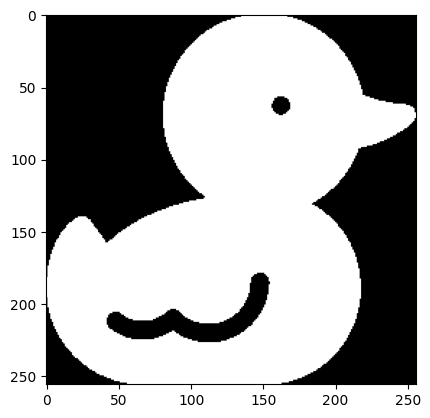

In [2]:
img = cv2.cvtColor(cv2.imread("../data/Duck.png"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [3]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

28632748

In [4]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [5]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.3,1], # alpha
]

nIter = 50

# Our Differential Evolution

In [6]:
from differential_evolution import differential_evolution

0 {'P': array([122.6865862 , 134.23114938, 128.        , 255.        ,
       255.        , 254.62574792,   1.        ]), 'nIt': 800, 'fun': 2173632, 'nFev': 24030}


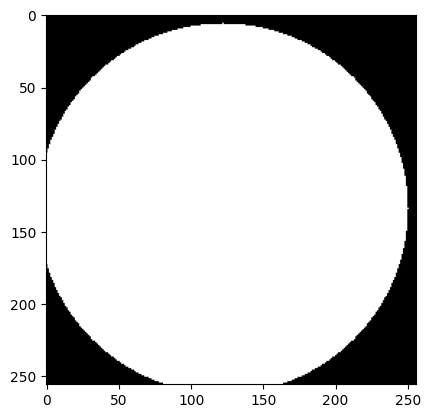

1 {'P': array([ 75.51142113, 193.59999595, 128.        , 255.        ,
       255.        , 255.        ,   1.        ]), 'nIt': 800, 'fun': 1102887, 'nFev': 24030}


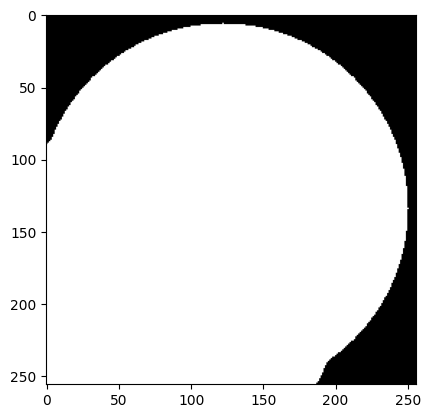

2 {'P': array([198.25405328,  18.66039701,  79.95426627, 255.        ,
       254.94600288, 255.        ,   0.99918989]), 'nIt': 800, 'fun': 61410, 'nFev': 24030}


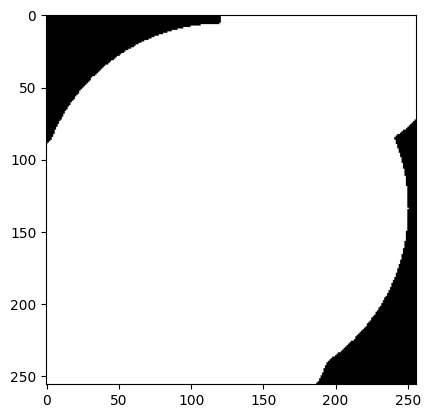

3 {'P': array([  6.14315136,  99.07790434,   5.        , 255.        ,
         0.        , 255.        ,   0.93828096]), 'nIt': 800, 'fun': 61410, 'nFev': 24030}


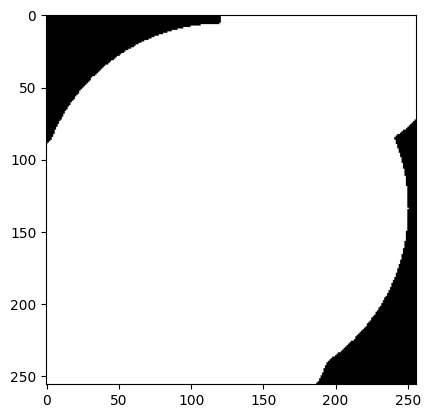

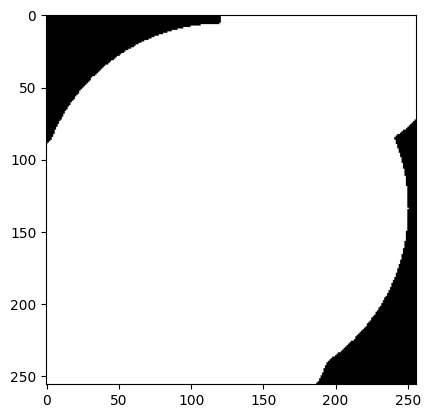

In [7]:
out = np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=30, cR = 0.4, nGen = 800) #The smaller cR is, it takes less risks
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [8]:
from scipy.optimize import differential_evolution

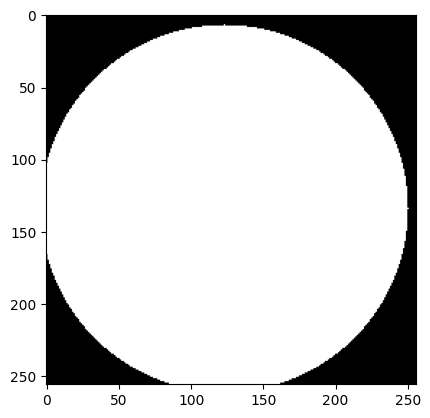

0      fun: 2411433.0
 message: 'Optimization terminated successfully.'
    nfev: 8093
     nit: 76
 success: True
       x: array([123.06877683, 134.10462802, 127.80494561, 254.53683416,
       254.70035827, 254.67669134,   0.9988083 ])


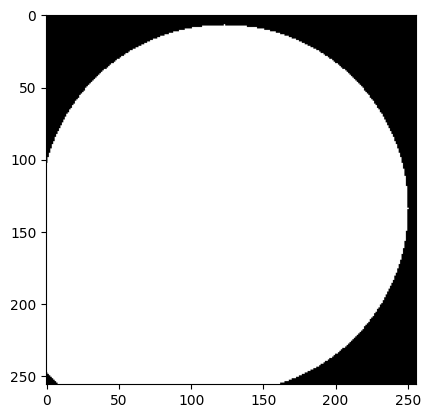

1      fun: 1200159.0
 message: 'Optimization terminated successfully.'
    nfev: 8513
     nit: 80
 success: True
       x: array([ 50.43686114, 206.35157928,  65.62771134, 254.81324026,
       254.66814519, 254.7846795 ,   0.99959975])


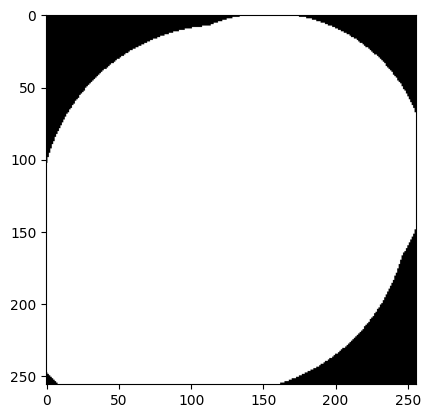

2      fun: 95265.0
 message: 'Optimization terminated successfully.'
    nfev: 14708
     nit: 139
 success: True
       x: array([154.47851012, 108.57661625, 109.47987051, 254.73157111,
       254.63821625, 254.84748227,   0.9996194 ])


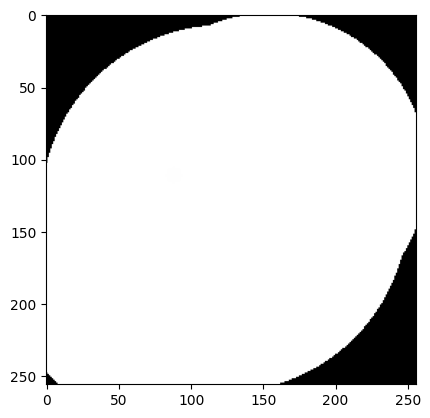

3      fun: 95508.0
 message: 'Optimization terminated successfully.'
    nfev: 3473
     nit: 32
 success: True
       x: array([ 88.75680921, 111.688346  ,   5.94451948, 253.08035495,
       253.42729437, 254.35676661,   0.69954421])


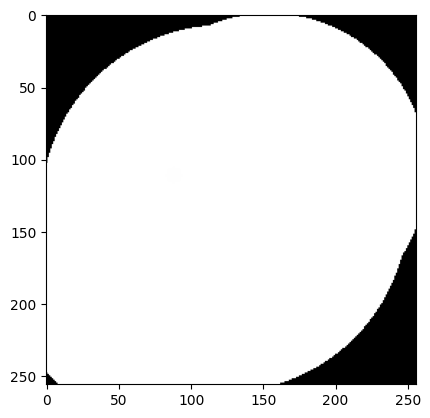

In [9]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img))
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.